# Featuring

In [1]:
# warningの無視
import warnings
warnings.filterwarnings('ignore')

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'Yu Mincho'

In [3]:
# 標準ライブラリ
import pickle
import datetime
from dateutil.relativedelta import relativedelta

# basic
import pandas as pd
import numpy as np

# visualize
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocessing
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats 

# User defined functions
from self_lib import tips
from self_lib import doggie_tail as d_

# Jupyter上で図を表示するためのコマンド
%matplotlib inline

In [4]:
# 表示列数を指定
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

### version setting

In [5]:
mode="pre"  #"pre / test"
# mode="test"  #"pre / test"

In [6]:
if mode=="pre":
    filepath="../data/feature/pre_"
elif mode=="test":
    filepath="../data/feature/test_"
else:
    print("miss spelling")

### Input

In [7]:
# data定義
with open('../_regulation/data_def.pickle','rb') as f:
    d_def = pickle.load(f)

In [8]:
# data読込み
if mode=="pre":
    # data
    raw_data=pd.read_pickle("../data/pre/pre_data.pickle")
elif mode=="test":
    # test_data
    raw_data=pd.read_pickle("../data/pre/pre_test_data.pickle")
else:
    print("miss spelling")

In [9]:
data = raw_data.copy()

In [10]:
data.shape

(255477, 30)

In [11]:
# データ列の定義を表示する
d_def

ID                                                               融資番号
Borrower                                債務法人の名前（特定を避けるため関連のない文字列に変換済）
City                                                     債務法人の所在地（都市）
State                                                     債務法人の所在地（州）
Zip                                                    債務法人の所在地（郵便番号）
Bank                                      融資銀行名（特定を避けるため関連のない文字列に変換済）
BankState                                                 融資銀行の所在地（州）
SystemCode                                                産業分類システムコード
ApprovalDate                                               支援機関による承認日
ApprovalFY                                                支援機関による承認年度
Term                                                          融資期間（月）
Employees                                                  債務法人による雇用数
ExistNew                                          1 = 既存の事業, 2 = 新規事業
CreateJob                                                    創出された職種数
RetainedJob         

In [12]:
# d_.d(data)

In [13]:
# data.head()

In [14]:
# corr_data=data.corr()

# f, ax = plt.subplots(figsize=(8, 8))
# ax=sns.heatmap(corr_data,vmin=-1,vmax=1,cmap='coolwarm')

In [15]:
# 目的変数yを取得する
if mode=='pre':
    data_y=data['LoanStatus']
    data_y.to_pickle(filepath + 'feature_data_y.pickle')
elif mode=='test':
    pass

In [16]:
# data['LoanStatus'].value_counts()

In [17]:
# data['UrbanRural'].value_counts(dropna=False)

In [18]:
# data['RevLineCr'].value_counts(dropna=False)

In [19]:
# 実際の貸金総額
data['ActualGross_log']=np.log(data['DisbursementGross']+data['BalanceGross'])
data['ActualGross']=data['DisbursementGross']+data['BalanceGross']

In [20]:
# カウントが少ない値を欠損値に置換
data['RevLineCr'][data['RevLineCr'].isna()]=np.NaN
data['RevLineCr'][~data['RevLineCr'].isin(['Y','N'])]=np.NaN
data['RevLineCr'][data['RevLineCr'].isin(['N'])]=0
data['RevLineCr'][data['RevLineCr'].isin(['Y'])]=1
# data['RevLineCr']=data['RevLineCr'].astype('int32')

In [21]:
# data['RevLineCr'].value_counts(dropna=False)

In [22]:
data['LowLoan'].value_counts(dropna=False)

N      221768
Y       31989
NaN       748
0         435
C         201
S         172
A         142
R          22
Name: LowLoan, dtype: int64

In [23]:
# カウントが少ない値を欠損値に置換
data['LowLoan'][data['LowLoan'].isna()]=np.NaN
data['LowLoan'][~data['LowLoan'].isin(['N','Y'])]=np.NaN
data['LowLoan'][data['LowLoan'].isin(['N'])]=0
data['LowLoan'][data['LowLoan'].isin(['Y'])]=1
# data['LowLoan']=data['LowLoan'].astype('int32')

In [24]:
data['LowLoan'].value_counts(dropna=False)

0.0    221768
1.0     31989
NaN      1720
Name: LowLoan, dtype: int64

In [25]:
# data['LowLoan'][data['LoanStatus']==1].value_counts(dropna=False)

In [26]:
# print(44640/221768)
# print(3002/31989)
# print(467/1720)
# print((3002+467)/(31989+1720))

In [27]:
# data['FranchiseCode'].value_counts(dropna=False)

In [28]:
# フランチャイズコードを細分化
# フランチャイズコードを５桁に補完する
def addSys0(FranchiseCode):
    if len(FranchiseCode)<=5:
        cnt0=5-len(FranchiseCode)
        return "0"*cnt0 + FranchiseCode
    else:
        pass
data['FranchiseCode']=data['FranchiseCode'].astype(str)
data['FranchiseCode']=data['FranchiseCode'].apply(lambda x : addSys0(x))

In [29]:
data['FranchiseCode_A']=data['FranchiseCode'].str[0]
data['FranchiseCode_B']=data['FranchiseCode'].str[1]
data['FranchiseCode_C']=data['FranchiseCode'].str[2]
data['FranchiseCode_D']=data['FranchiseCode'].str[3]
data['FranchiseCode_E']=data['FranchiseCode'].str[4]

In [30]:
# data['CreateJob'].value_counts(dropna=False)
# data['CreateJob'].value_counts()

In [31]:
# CreateJobかどうかのカテゴリーに変換
data['CreateJob_flg']=0
data['CreateJob_flg'][data['CreateJob']>0]=1

In [32]:
# data['CreateJob'].value_counts()

In [33]:
# data['RetainedJob'].value_counts(dropna=False)

In [34]:
# RetainedJobかどうかのカテゴリーに変換
data['RetainedJob_flg']=0
data['RetainedJob_flg'][data['RetainedJob']>0]=1

In [35]:
# data['RetainedJob'].value_counts(dropna=False)

In [36]:
# data['ExistNew'].value_counts(dropna=False)

In [37]:
# ExistNewかどうかのカテゴリーに変換
data['ExistNew'][data['ExistNew'].isna()]=0
data['ExistNew']=data['ExistNew'].astype(int)

In [38]:
# data['ExistNew'].value_counts(dropna=False)

In [39]:
data['Crt-RetJob']=data['RetainedJob']-data['CreateJob']

In [40]:
data['Crt-RetJob_rate']=np.round(data['Crt-RetJob']/(data['CreateJob']+1),decimals=3)

In [41]:
data['CRrate_L']=data['Crt-RetJob_rate']*data['LoanAmount']
data['CRrate_D']=data['Crt-RetJob_rate']*data['DisbursementGross']
data['CRrate_B']=data['Crt-RetJob_rate']*data['BalanceGross']

In [42]:
data['CRrate_T']=data['Crt-RetJob_rate']*data['Term']

In [43]:
data['Crt_Emp']=np.round(np.sqrt(data['Employees']/(data['CreateJob']+1)),decimals=4)
data['Ret_Emp']=np.round(np.sqrt(data['Employees']/(data['RetainedJob']+1)),4)
data['Crt-Ret_Emp']=np.round(np.sqrt(data['Employees']*1000/(data['Crt-RetJob']+1000)),4)

In [44]:
data['L_Crt']=np.round(data['LoanAmount']/(data['CreateJob']+1),decimals=4)
data['D_Crt']=np.round(data['DisbursementGross']/(data['CreateJob']+1),decimals=4)
data['B_Crt']=np.round(data['BalanceGross']/(data['CreateJob']+1),decimals=4)

In [45]:
data['L_Ret']=np.round(data['LoanAmount']/(data['RetainedJob']+1),decimals=4)
data['D_Ret']=np.round(data['DisbursementGross']/(data['RetainedJob']+1),decimals=4)
data['B_Ret']=np.round(data['BalanceGross']/(data['RetainedJob']+1),decimals=4)

In [46]:
data['L_Emp']=np.round(np.log(data['LoanAmount']/(data['Employees']+1)),decimals=4)
data['D_Emp']=np.round(np.log(data['DisbursementGross']/(data['Employees']+1)),decimals=4)
data['B_Emp']=np.round(np.log(data['BalanceGross']/(data['Employees']+1)),decimals=4)

In [47]:
data['Crt_Term']=np.round((data['Term']+1)/(data['CreateJob']+1),decimals=4)
data['Rer_Term']=np.round((data['Term']+1)/(data['RetainedJob']+1),decimals=4)
data['Emp_Term']=np.round((data['Term']+1)/(data['Employees']+1),decimals=4)

In [48]:
data['L_Term_Crt']=np.round(np.log(data['LoanAmount']/(data['Term']+1)/(data['CreateJob']+1)),decimals=4)
data['D_Term_Crt']=np.round(np.log(data['DisbursementGross']/(data['Term']+1)/(data['CreateJob']+1)),decimals=4)
data['B_Term_Crt']=np.round(np.log(data['BalanceGross']/(data['Term']+1)/(data['CreateJob']+1)),decimals=4)

In [49]:
data['L_Term_Ret']=np.round(np.log(data['LoanAmount']/(data['Term']+1)/(data['RetainedJob']+1)),decimals=4)
data['D_Term_Ret']=np.round(np.log(data['DisbursementGross']/(data['Term']+1)/(data['RetainedJob']+1)),decimals=4)
data['B_Term_Ret']=np.round(np.log(data['BalanceGross']/(data['Term']+1)/(data['RetainedJob']+1)),decimals=4)

In [50]:
data['L_Term_Emp']=np.round(np.log(data['LoanAmount']/(data['Term']+1)/(data['Employees']+1)),decimals=4)
data['D_Term_Emp']=np.round(np.log(data['DisbursementGross']/(data['Term']+1)/(data['Employees']+1)),decimals=4)
data['B_Term_Emp']=np.round(np.log(data['BalanceGross']/(data['Term']+1)/(data['Employees']+1)),decimals=4)

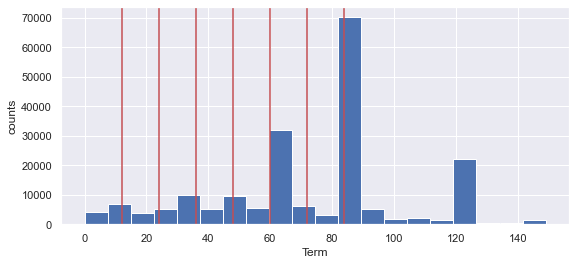

In [51]:
# Figureの初期化
fig = plt.figure(figsize=(20, 4))

ax1 = plt.subplot(121)   
ax1.hist(data['Term'].loc[data['Term']<150],bins=20)
plt.axvline(x=12, ymin=0, ymax=1,color="r")
plt.axvline(x=24, ymin=0, ymax=1,color="r")
plt.axvline(x=36, ymin=0, ymax=1,color="r")
plt.axvline(x=48, ymin=0, ymax=1,color="r")
plt.axvline(x=60, ymin=0, ymax=1,color="r")
plt.axvline(x=72, ymin=0, ymax=1,color="r")
plt.axvline(x=84, ymin=0, ymax=1,color="r")

# ax1 = plt.subplot(122)   
# ax1.hist(data['Term'].loc[data['LoanStatus']==1].loc[data['Term']<150],bins=100,color='r')
# plt.axvline(x=12, ymin=0, ymax=1,color="b")
# plt.axvline(x=24, ymin=0, ymax=1,color="b")
# plt.axvline(x=36, ymin=0, ymax=1,color="b")
# plt.axvline(x=48, ymin=0, ymax=1,color="b")
# plt.axvline(x=60, ymin=0, ymax=1,color="b")
# plt.axvline(x=72, ymin=0, ymax=1,color="b")
# plt.axvline(x=84, ymin=0, ymax=1,color="b")

ax1.set_xlabel('Term')
ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend()

# 表示
plt.show()

In [52]:
data['Term_264']=data["Term"]%264
data['Term_252']=data["Term"]%252
data['Term_240']=data["Term"]%240
data['Term_228']=data["Term"]%228
data['Term_216']=data["Term"]%216
data['Term_204']=data["Term"]%204
data['Term_192']=data["Term"]%192
data['Term_180']=data["Term"]%180
data['Term_168']=data["Term"]%168
data['Term_156']=data["Term"]%156
data['Term_144']=data["Term"]%144
data['Term_132']=data["Term"]%132
data['Term_120']=data["Term"]%120
data['Term_84']=data["Term"]%108
data['Term_84']=data["Term"]%96
data['Term_84']=data["Term"]%84
data['Term_72']=data["Term"]%72
data['Term_60']=data["Term"]%60
data['Term_48']=data["Term"]%48
data['Term_36']=data["Term"]%36
data['Term_24']=data["Term"]%24
data['Term_12']=data["Term"]%12
data['Term_6']=data["Term"]%6
data['Term_3']=data["Term"]%3
data['Term_2']=data["Term"]%2

In [53]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(111)   
# # ax1.hist(data['ApprovalDate'][data['ApprovalDate']<"2020-01-01"]["1988-01-01"<data['ApprovalDate']],bins=100)
# # ax1.hist(data['ApprovalDate'][data['ApprovalDate']<"2020-01-01"]["1988-01-01"<data['ApprovalDate']][data['LoanStatus']==1],bins=100)


# ax2 = plt.subplot(111)   
# # ax2.hist(data['DisbursementDate'][data['DisbursementDate']<"2020-01-01"]["1988-01-01"<data['DisbursementDate']],bins=100,alpha=0.5)
# # ax2.hist(data['DisbursementDate'][data['DisbursementDate']<"2020-01-01"]["1988-01-01"<data['DisbursementDate']][data['LoanStatus']==1],bins=100,alpha=0.5)


# ax1.set_xlabel('Term')
# ax1.set_ylabel('counts')

# # 凡例の表示
# plt.legend(["Approval","Disbursment"])

# # 表示
# plt.show()

In [54]:
# a_data=data.copy()

In [55]:
from dateutil.relativedelta import relativedelta

# 貸金期日
def addMonth(month):
    return relativedelta(years=month//12,months=month%12)
# a_data[['ApprovalDate','Approval_M']].apply(lambda x: x['ApprovalDate'] + relativedelta(month=+x['Approval_M']),axis=1)
data['EndDate']=data[['ApprovalDate','Term']].apply(lambda x: x['ApprovalDate'] + addMonth(x['Term']),axis=1)

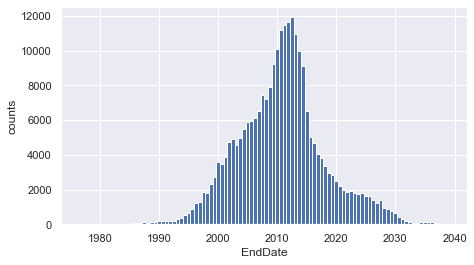

In [56]:
# Figureの初期化
fig = plt.figure(figsize=(16, 4))

ax1 = plt.subplot(121)   
ax1.hist(data['EndDate'].loc[data['EndDate'].dt.year<2040],bins=100)

# ax2 = plt.subplot(122)   
# ax2.hist(data['EndDate'].loc[data['LoanStatus']==1].loc[data['EndDate'].dt.year<2040],bins=100,color='r')

ax1.set_xlabel('EndDate')
ax1.set_ylabel('counts')

# 表示
plt.show()

In [57]:
data['ApprovalDate_str']=np.round(np.log(data['ApprovalDate'].astype(str).str.replace('-','').astype(int)),decimals=4)

In [58]:
data['DisbursementDate_str']=np.round(np.log(data['DisbursementDate'].astype(str).str.replace('-','').astype(int)),decimals=4)

In [59]:
data['EndDate_str']=np.round(np.log(data['EndDate'].astype(str).str.replace('-','').astype(int)),decimals=4)

In [60]:
data['EndDate_Y']=data['EndDate'].dt.year
data['EndDate_M']=data['EndDate'].dt.month
data['EndDate_D']=data['EndDate'].dt.day

In [61]:
data['Aprroval_weekday'] = data['ApprovalDate'].dt.dayofweek

In [62]:
data['Disbursement_weekday'] = data['DisbursementDate'].dt.dayofweek

In [63]:
data['EndDate_weekday'] = data['EndDate'].dt.dayofweek

In [64]:
# リーマンと被ってるか
def IsYearLehmanSt(AppYear):
    if 2002< AppYear <2009:
        return 1
    else:
        return 0
def IsYearLehmanEd(EndYear):
    if 2002< EndYear <2018:
        return 1
    else:
        return 0

In [65]:
data['LehmanApp_s']=data['Approval_Y'].apply(lambda x:IsYearLehmanSt(x))
data['LehmanApp_e']=data['Approval_Y'].apply(lambda x:IsYearLehmanEd(x))
data['LehmanDis_s']=data['DisbursementDate_Y'].apply(lambda x:IsYearLehmanSt(x))
data['LehmanDis_e']=data['DisbursementDate_Y'].apply(lambda x:IsYearLehmanEd(x))
data['LehmanEnd_s']=data['EndDate_Y'].apply(lambda x:IsYearLehmanSt(x))
data['LehmanEnd_e']=data['EndDate_Y'].apply(lambda x:IsYearLehmanEd(x))

In [66]:
# 月末かどうか
import calendar
import datetime
def IsMonthEnd(year,month,date):
    d=datetime.date(year, month, calendar.monthrange(year, month)[1])
    if d.day==date:
        return 1
    else:
        return 0
# IsMonthEnd(2021,3,1)

In [67]:
# 実質月末かどうか
import calendar
import datetime
def IsMonthEndAc(year,month,date):
    d=datetime.date(year, month, calendar.monthrange(year, month)[1])
    if d.weekday()==5:
        d=datetime.date(year, month, calendar.monthrange(year, month)[1]-1)
    if d.weekday()==6:
        d=datetime.date(year, month, calendar.monthrange(year, month)[1]-2)
    if d.day==date:
        return datetime.date(year, month, calendar.monthrange(year, month)[1]).day
    else:
        return date

In [68]:
data['Aprroval_MonthEnd']=data[['Approval_Y','Approval_M','Approval_D']].apply(lambda x: IsMonthEnd(x['Approval_Y'],x['Approval_M'],x['Approval_D']),axis=1)

In [69]:
data['Disbursement_MonthEnd']=data[['DisbursementDate_Y','DisbursementDate_M','DisbursementDate_D']].apply(lambda x: IsMonthEnd(x['DisbursementDate_Y'],x['DisbursementDate_M'],x['DisbursementDate_D']),axis=1)

In [70]:
data['EndDate_MonthEnd']=data[['EndDate_Y','EndDate_M','EndDate_D']].apply(lambda x: IsMonthEnd(x['EndDate_Y'],x['EndDate_M'],x['EndDate_D']),axis=1)

In [71]:
data['Aprroval_MonthEnd']=data[['Approval_Y','Approval_M','Approval_D']].apply(lambda x: IsMonthEndAc(x['Approval_Y'],x['Approval_M'],x['Approval_D']),axis=1)

In [72]:
data['Disbursement_MonthEnd']=data[['DisbursementDate_Y','DisbursementDate_M','DisbursementDate_D']].apply(lambda x: IsMonthEndAc(x['DisbursementDate_Y'],x['DisbursementDate_M'],x['DisbursementDate_D']),axis=1)

In [73]:
data['EndDate_MonthEnd']=data[['EndDate_Y','EndDate_M','EndDate_D']].apply(lambda x: IsMonthEndAc(x['EndDate_Y'],x['EndDate_M'],x['EndDate_D']),axis=1)

In [74]:
data['LoanAmount_log']=np.log(data['LoanAmount'])

In [75]:
data['Term_LoanAmount_log']=np.round(data['Term']/data['LoanAmount_log'],decimals=3)

In [76]:
data['Term_LoanAmount_log_sqrt']=np.sqrt(data['Term']/np.log(data['LoanAmount_log']))

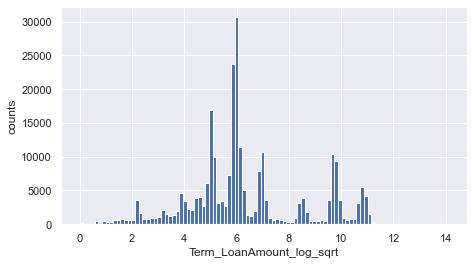

In [77]:
# Figureの初期化
fig = plt.figure(figsize=(16, 4))

ax1 = plt.subplot(121)   
ax1.hist(data['Term_LoanAmount_log_sqrt'],bins=100)

# ax2 = plt.subplot(122)   
# ax2.hist(data['Term_LoanAmount_log_sqrt'].loc[data['LoanStatus']==1],bins=100,color='r')

ax1.set_xlabel('Term_LoanAmount_log_sqrt')
ax1.set_ylabel('counts')

# 表示
plt.show()

#### 産業分類コード
http://naics-scian.inegi.org.mx/naics_scian/default_i.aspx

In [78]:
# data['SystemCode'].value_counts()

In [79]:
# 産業分類コードを細分化
# 6桁に補完する
def addSys0(SystemCode):
    if len(SystemCode)<=6:
        cnt0=6-len(SystemCode)
        return "0"*cnt0 + SystemCode
    else:
        pass

data['SystemCode']=data['SystemCode'].astype(str)
data['SystemCode']=data['SystemCode'].apply(lambda x : addSys0(x))

In [80]:
# data['SystemCode'].head(1)

In [81]:
#
data['NICS_Sector']=data['SystemCode'].str[0:2]
data['NICS_Subsector']=data['SystemCode'].str[2]
data['NICS_Subsectors']=data['SystemCode'].str[0:3]
data['NICS_IndustryGroup']=data['SystemCode'].str[3]
data['NICS_IndustryGroups']=data['SystemCode'].str[0:4]
data['NICS_Industory']=data['SystemCode'].str[4]
data['NICS_NationIndustry']=data['SystemCode'].str[5]

In [82]:
data['NICS_44_10']=0
data['NICS_44_10'].loc[(data['NICS_Sector']=='44') & (data['Term']<10)]=1

In [83]:
# data['NICS_Sector'].head(1)

In [84]:
# data['NICS_Subsector'].head(1)

In [85]:
# data['NICS_IndustryGroup'].head(1)

In [86]:
# data['NICS_Industory'].head(1)

In [87]:
# data['NICS_NationIndustry'].head(1)

In [88]:
# 産業分類コードがあるかないかのフラグ
data['SystemCode_flg']=0
data['SystemCode']=data['SystemCode'].astype(int)

data['SystemCode_flg'].loc[data['SystemCode']>0]=1
data['SystemCode_flg'].loc[data['SystemCode']==0]=0

https://ja.wikipedia.org/wiki/ZIP%E3%82%B3%E3%83%BC%E3%83%89

In [89]:
# 住所コードを５桁に補完する
def addZip0(Zip):
    if len(Zip)<=5:
        cnt0=5-len(Zip)
        return "0"*cnt0 + Zip
    else:
        pass

data['Zip']=data['Zip'].apply(lambda x : addZip0(x)).astype(str)
data['zip_A']=data['Zip'].str[0]
data['zip_B']=data['Zip'].str[1:3]
data['zip_C']=data['Zip'].str[3:]

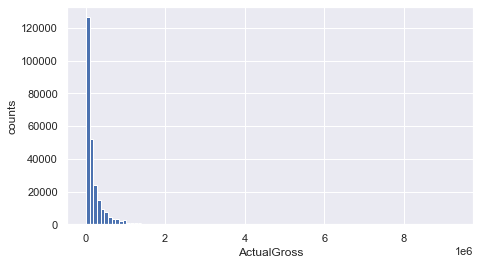

In [90]:
# Figureの初期化
fig = plt.figure(figsize=(16, 4))

ax1 = plt.subplot(121)   
ax1.hist((data['ActualGross']),bins=100)

# ax2 = plt.subplot(122)   
# ax2.hist(data['ActualGross'].loc[data['LoanStatus']==1],bins=100,color='r')

ax1.set_xlabel('ActualGross')
ax1.set_ylabel('counts')

# 表示
plt.show()

In [91]:
# data['boxcox_ActualGross']=stats.boxcox(data['ActualGross'],lmbda=0,alpha=0)

In [92]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(121)   
# ax1.hist(data['boxcox_ActualGross'],bins=100)

# ax2 = plt.subplot(122)   
# ax2.hist(data['boxcox_ActualGross'].loc[data['LoanStatus']==1],bins=100,color='r')

# ax1.set_xlabel('boxcox_ActualGross')
# ax1.set_ylabel('counts')

# # 表示
# plt.show()

In [93]:
data['Dis_App']=(data['DisbursementDate']-data['ApprovalDate']).dt.days.astype('int32')
data['Dis_App']

ID
9568103009     99
7208134000     36
8283143001    101
7653414010     33
9066434010     97
             ... 
3045015002     19
4358364001     98
8787214009     17
7602753000     39
4561515000     31
Name: Dis_App, Length: 255477, dtype: int32

In [94]:
# 返済間隔
data['Dis_App_Month']=data['DisbursementDate'].dt.month-data['ApprovalDate'].dt.month
# data['Dis_App_Month'][data['Dis_App_Month']<1]=1

In [95]:
data['ActualTerm']=data['Term']-data['Dis_App_Month'].apply(lambda x: x if x<0 else 0)
##
data['ActualTerm_144']=data["ActualTerm"]%144
data['ActualTerm_132']=data["ActualTerm"]%132
data['ActualTerm_120']=data["ActualTerm"]%120
data['ActualTerm_108']=data["ActualTerm"]%108
data['ActualTerm_96']=data["ActualTerm"]%96
data['ActualTerm_84']=data["ActualTerm"]%84
data['ActualTerm_72']=data["ActualTerm"]%72
data['ActualTerm_60']=data["ActualTerm"]%60
data['ActualTerm_48']=data["ActualTerm"]%48
data['ActualTerm_36']=data["ActualTerm"]%36
data['ActualTerm_24']=data["ActualTerm"]%24
#
data['ActualTerm_12']=data["ActualTerm"]%12
data['ActualTerm_6']=data["ActualTerm"]%6
data['ActualTerm_3']=data["ActualTerm"]%3
data['ActualTerm_2']=data["ActualTerm"]%2

In [96]:
data['End_App_mean']=(data['EndDate'].dt.year-data['ApprovalDate'].dt.year)/2+data['ApprovalDate'].dt.year
data['Dis_App_mean']=(data['EndDate'].dt.year-data['DisbursementDate'].dt.year)/2+data['DisbursementDate'].dt.year

In [97]:
data['End_App_mean-2002']=data['End_App_mean']-2002
data['Dis_App_mean-2002']=data['Dis_App_mean']-2002

In [98]:
data['End_App_mean-2003']=data['End_App_mean']-2003
data['Dis_App_mean-2003']=data['Dis_App_mean']-2003

In [99]:
data['End_App_mean-2004']=data['End_App_mean']-2004
data['Dis_App_mean-2004']=data['Dis_App_mean']-2004

In [100]:
data['End_App_mean-2005']=data['End_App_mean']-2005
data['Dis_App_mean-2005']=data['Dis_App_mean']-2005

In [101]:
data['End_App_mean-2006']=data['End_App_mean']-2006
data['Dis_App_mean-2006']=data['Dis_App_mean']-2006

In [102]:
data['End_App_mean-2007']=data['End_App_mean']-2007
data['Dis_App_mean-2007']=data['Dis_App_mean']-2007

In [103]:
data['End_App_mean-2008']=data['End_App_mean']-2008
data['Dis_App_mean-2008']=data['Dis_App_mean']-2008

In [104]:
data['End_App_mean-2009']=data['End_App_mean']-2009
data['Dis_App_mean-2009']=data['Dis_App_mean']-2009

In [105]:
data['End_App_mean-2010']=data['End_App_mean']-2010
data['Dis_App_mean-2010']=data['Dis_App_mean']-2010

In [106]:
data['End_App_mean-2011']=data['End_App_mean']-2011
data['Dis_App_mean-2011']=data['Dis_App_mean']-2011

In [107]:
data['End_App_mean-2012']=data['End_App_mean']-2012
data['Dis_App_mean-2012']=data['Dis_App_mean']-2012

In [108]:
data['End_App_mean-2013']=data['End_App_mean']-2013
data['Dis_App_mean-2013']=data['Dis_App_mean']-2013

In [109]:
data['End_App_mean-2014']=data['End_App_mean']-2014
data['Dis_App_mean-2014']=data['Dis_App_mean']-2014

In [110]:
data['End_App_mean-2015']=data['End_App_mean']-2015
data['Dis_App_mean-2015']=data['Dis_App_mean']-2015

In [111]:
data['End_App_mean-2016']=data['End_App_mean']-2016
data['Dis_App_mean-2016']=data['Dis_App_mean']-2016

In [112]:
data['End_App_mean-2017']=data['End_App_mean']-2017
data['Dis_App_mean-2017']=data['Dis_App_mean']-2017

In [113]:
data['End_App_mean-2018']=data['End_App_mean']-2018
data['Dis_App_mean-2018']=data['Dis_App_mean']-2018

In [114]:
# 返済間隔
data['Dis_App_Day']=data['DisbursementDate']-data['ApprovalDate']
data['Dis_App_Day']=data['Dis_App_Day'].dt.days.astype('int32')
data['Dis_App_Day'][data['Dis_App_Day']<0]=0
data['Dis_App_Day']=np.sqrt(data['Dis_App_Day'])

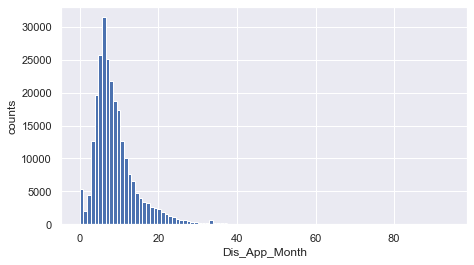

In [115]:
# Figureの初期化
fig = plt.figure(figsize=(16, 4))

ax1 = plt.subplot(121)   
ax1.hist(data['Dis_App_Day'],bins=100)

# ax2 = plt.subplot(122)   
# ax2.hist(data['Dis_App_Month'].loc[data['LoanStatus']==1],bins=100,color='r')

ax1.set_xlabel('Dis_App_Month')
ax1.set_ylabel('counts')

# 表示
plt.show()

In [116]:
# 返済回数
data['ReturnCnt']=1
data['ReturnCnt']=data['Term']/data['Dis_App_Month']
data['ReturnCnt'][data['Dis_App_Month']==0]=1

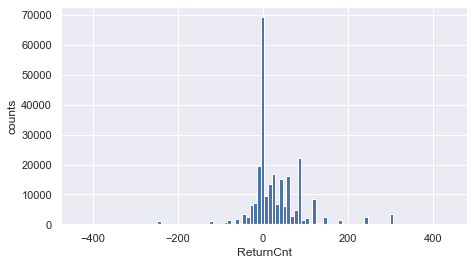

In [117]:
# Figureの初期化
fig = plt.figure(figsize=(16, 4))

ax1 = plt.subplot(121)   
ax1.hist(data['ReturnCnt'],bins=100)

# ax2 = plt.subplot(122)   
# ax2.hist(data['ReturnCnt'].loc[data['LoanStatus']==1],bins=100,color='r')

ax1.set_xlabel('ReturnCnt')
ax1.set_ylabel('counts')

# 表示
plt.show()

In [118]:
data['a-l_lRate']=np.round(((data['ActualGross']-data['LoanAmount'])/data['LoanAmount'])*100,decimals=4)

In [119]:
data['dif_L-D']=data['LoanAmount']-data['DisbursementGross']

In [120]:
data['dif_L-D_L']=np.sqrt(1-(data['dif_L-D']/data['LoanAmount']))

In [121]:
data['dif_L-D_T']=np.round((data['dif_L-D']/data['Term']),decimals=4)

In [122]:
data['Dis_App_Month_Term']=np.round((-data['Dis_App_Month']/data['Term']),decimals=4)

In [123]:
data['L^T_D']=np.round((data['LoanAmount']*data['Term']-data['LoanAmount']*data['Term']/-data['Dis_App_Month'])/(data['LoanAmount'])/data['Dis_App_Month_Term'],decimals=4)

In [124]:
data['Rev_T']=0
data['Rev_T'].loc[(data['RevLineCr']==1) & (data["Term"]%2!=0)]=1

In [125]:
#
data['ret_L-D_T']=0
data['ret_L-D_T'].loc[(data['Dis_App_Month']<0) & (data['dif_L-D']==0) & (data["Term"]<84) & (data["Term"]%2!=0)]=1

In [126]:
data['L_Dis_App']=np.round(data['LoanAmount']/data['Dis_App'],decimals=4)
data['D_Dis_App']=np.round(data['DisbursementGross']/data['Dis_App'],decimals=4)

In [127]:
# 1月当たりの返済金額

In [128]:
data['ReturnAmountPerMonth_A']=0
data['ReturnAmountPerMonth_A']=np.round(data['ActualGross']/data['Term'],decimals=4)
data['ReturnAmountPerMonth_A'][data['Term']==0]=data['ActualGross']
data['ReturnAmountPerMonth_A']=np.log(data['ReturnAmountPerMonth_A'])

In [129]:
data['ReturnAmountPerMonth_B']=0
data['ReturnAmountPerMonth_B']=np.round(data['BalanceGross']/data['Term'],decimals=4)
data['ReturnAmountPerMonth_B'][data['Term']==0]=data['BalanceGross']
data['ReturnAmountPerMonth_B']=np.log(data['ReturnAmountPerMonth_B'])

In [130]:
data['ReturnAmountPerMonth_D']=0
data['ReturnAmountPerMonth_D']=np.round(data['DisbursementGross']/data['Term'],decimals=4)
data['ReturnAmountPerMonth_D'][data['Term']==0]=data['DisbursementGross']
data['ReturnAmountPerMonth_D']=np.log(data['ReturnAmountPerMonth_D'])

In [131]:
data['ReturnAmountPerMonth_L']=0
data['ReturnAmountPerMonth_L']=np.round(data['LoanAmount']/data['Term'],decimals=4)
data['ReturnAmountPerMonth_L'][data['Term']==0]=data['LoanAmount']
data['ReturnAmountPerMonth_L']=np.log(data['ReturnAmountPerMonth_L'])

In [132]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(121)   
# ax1.hist(data['ReturnAmountPerMonth'].loc[data['ReturnAmountPerMonth']<40000],bins=100)

# # ax2 = plt.subplot(122)   
# # ax2.hist(data['ReturnAmountPerMonth'].loc[data['LoanStatus']==1].loc[data['ReturnAmountPerMonth']<40000],bins=100,color='r')

# ax1.set_xlabel('ReturnAmountPerMonth')
# ax1.set_ylabel('counts')

# # 表示
# plt.show()

In [133]:
# 1回あたりの返済金額

In [134]:
data['ReturnAmountPerCnt_A']=0
data['ReturnAmountPerCnt_A']=data['ActualGross']/data['ReturnCnt']
data['ReturnAmountPerCnt_A'][data['ReturnCnt']==0]=data['LoanAmount']
data['ReturnAmountPerCnt_A']=np.round(data['ReturnAmountPerCnt_A'],decimals=4)

In [135]:
data['ReturnAmountPerCnt_B']=0
data['ReturnAmountPerCnt_B']=data['BalanceGross']/data['ReturnCnt']
data['ReturnAmountPerCnt_B'][data['ReturnCnt']==0]=data['BalanceGross']
data['ReturnAmountPerCnt_B']=np.round(data['ReturnAmountPerCnt_B'],decimals=4)

In [136]:
data['ReturnAmountPerCnt_D']=0
data['ReturnAmountPerCnt_D']=data['DisbursementGross']/data['ReturnCnt']
data['ReturnAmountPerCnt_D'][data['ReturnCnt']==0]=data['DisbursementGross']
data['ReturnAmountPerCnt_D']=np.round(data['ReturnAmountPerCnt_D'],decimals=4)

In [137]:
data['ReturnAmountPerCnt_L']=0
data['ReturnAmountPerCnt_L']=data['LoanAmount']/data['ReturnCnt']
data['ReturnAmountPerCnt_L'][data['ReturnCnt']==0]=data['LoanAmount']
data['ReturnAmountPerCnt_L']=np.round(data['ReturnAmountPerCnt_L'],decimals=4)

In [138]:
# data['ReturnAmountPerCnt_log']=np.log(np.sqrt(np.log(data['ReturnAmountPerCnt'])))

In [139]:
# # Figureの初期化
# fig = plt.figure(figsize=(16, 4))

# ax1 = plt.subplot(121)   
# ax1.hist(data['ReturnAmountPerCnt_log'],bins=100)

# # ax2 = plt.subplot(122)   
# # ax2.hist(data['ReturnAmountPerCnt'].loc[data['LoanStatus']==1].loc[data['ReturnAmountPerCnt']<40000],bins=100,color='r')

# ax1.set_xlabel('ReturnAmountPerCnt')
# ax1.set_ylabel('counts')

# # 表示
# plt.show()

In [140]:
# 実際の貸金金額と第三者保証の比率
data['GuaranteedAmountRatio_A']=np.round(data['GuaranteedLoan']/data['ActualGross'],decimals=4)
data['GuaranteedAmountRatio_B']=np.round(data['GuaranteedLoan']/data['BalanceGross'],decimals=4)
data['GuaranteedAmountRatio_D']=np.round(data['GuaranteedLoan']/data['DisbursementGross'],decimals=4)
data['GuaranteedAmountRatio_L']=np.round(data['GuaranteedLoan']/data['LoanAmount'],decimals=4)

In [141]:
# 実際の貸金金額と金融機関承認額の比率
data['ProperAmountRatio_A']=np.log(np.sqrt(data['LoanAmount']/data['ActualGross']))
data['ProperAmountRatio_B']=np.log(np.sqrt(data['LoanAmount']/data['BalanceGross']))
data['ProperAmountRatio_D']=np.log(np.sqrt(data['LoanAmount']/data['DisbursementGross']))
data['ProperAmountRatio_G']=np.log(np.sqrt(data['LoanAmount']/data['GuaranteedLoan']))

In [142]:
# 金融機関承認額と第三者保証の差額
data['dif_Bank-Grt']=data['LoanAmount']-data['GuaranteedLoan']

In [143]:
data['dif_Bank-Grt_sqrt']=np.round(data['dif_Bank-Grt']/data['GuaranteedLoan'],decimals=4)

In [144]:
data['dif_Bank-Grt_A']=np.round(data['dif_Bank-Grt']*data['ActualGross'],decimals=4)
data['dif_Bank-Grt_B']=np.round(data['dif_Bank-Grt']*data['BalanceGross'],decimals=4)
data['dif_Bank-Grt_D']=np.round(data['dif_Bank-Grt']*data['DisbursementGross'],decimals=4)
data['dif_Bank-Grt_G']=np.round(data['dif_Bank-Grt']*data['GuaranteedLoan'],decimals=4)
data['dif_Bank-Grt_L']=np.round(data['dif_Bank-Grt']*data['LoanAmount'],decimals=4)

In [145]:
data['dif_Bank-Grt^A']=np.sqrt(np.log(data['dif_Bank-Grt']*data['ActualGross']))
data['dif_Bank-Grt^B']=np.sqrt(np.log(data['dif_Bank-Grt']*data['BalanceGross']))
data['dif_Bank-Grt^D']=np.sqrt(np.log(data['dif_Bank-Grt']*data['DisbursementGross']))
data['dif_Bank-Grt^G']=np.sqrt(np.log(data['dif_Bank-Grt']*data['GuaranteedLoan']))
data['dif_Bank-Grt^L']=np.sqrt(np.log(data['dif_Bank-Grt']*data['LoanAmount']))

In [146]:
data['a_amount_AA']=np.round(data['ActualGross']-data['ReturnAmountPerMonth_A'],decimals=4)
data['a_amount_BA']=np.round(data['ActualGross']-data['ReturnAmountPerMonth_B'],decimals=4)
data['a_amount_DA']=np.round(data['ActualGross']-data['ReturnAmountPerMonth_D'],decimals=4)
data['a_amount_LA']=np.round(data['ActualGross']-data['ReturnAmountPerMonth_L'],decimals=4)

data['a_amount_AB']=np.round(data['BalanceGross']-data['ReturnAmountPerMonth_A'],decimals=4)
data['a_amount_BB']=np.round(data['BalanceGross']-data['ReturnAmountPerMonth_B'],decimals=4)
data['a_amount_DB']=np.round(data['BalanceGross']-data['ReturnAmountPerMonth_D'],decimals=4)
data['a_amount_LB']=np.round(data['BalanceGross']-data['ReturnAmountPerMonth_L'],decimals=4)

data['a_amount_AD']=np.round(data['DisbursementGross']-data['ReturnAmountPerMonth_A'],decimals=4)
data['a_amount_BD']=np.round(data['DisbursementGross']-data['ReturnAmountPerMonth_B'],decimals=4)
data['a_amount_DD']=np.round(data['DisbursementGross']-data['ReturnAmountPerMonth_D'],decimals=4)
data['a_amount_LD']=np.round(data['DisbursementGross']-data['ReturnAmountPerMonth_L'],decimals=4)

In [147]:
data['a_amount__AA']=np.round(data['ActualGross']/data['ReturnAmountPerMonth_A'],decimals=4)
data['a_amount__BA']=np.round(data['ActualGross']/data['ReturnAmountPerMonth_B'],decimals=4)
data['a_amount__DA']=np.round(data['ActualGross']/data['ReturnAmountPerMonth_D'],decimals=4)
data['a_amount__LA']=np.round(data['ActualGross']/data['ReturnAmountPerMonth_L'],decimals=4)

data['a_amount__AB']=np.round(data['BalanceGross']/data['ReturnAmountPerMonth_A'],decimals=4)
data['a_amount__BB']=np.round(data['BalanceGross']/data['ReturnAmountPerMonth_B'],decimals=4)
data['a_amount__DB']=np.round(data['BalanceGross']/data['ReturnAmountPerMonth_D'],decimals=4)
data['a_amount__LB']=np.round(data['BalanceGross']/data['ReturnAmountPerMonth_L'],decimals=4)

data['a_amount__AD']=np.round(data['DisbursementGross']/data['ReturnAmountPerMonth_A'],decimals=4)
data['a_amount__BD']=np.round(data['DisbursementGross']/data['ReturnAmountPerMonth_B'],decimals=4)
data['a_amount__DD']=np.round(data['DisbursementGross']/data['ReturnAmountPerMonth_D'],decimals=4)
data['a_amount__LD']=np.round(data['DisbursementGross']/data['ReturnAmountPerMonth_L'],decimals=4)

In [148]:
data['a_rate_AA']=np.round(data['a_amount_AA']*data['Dis_App_Month'],decimals=4)
data['a_rate_BA']=np.round(data['a_amount_BA']*data['Dis_App_Month'],decimals=4)
data['a_rate_DA']=np.round(data['a_amount_DA']*data['Dis_App_Month'],decimals=4)
data['a_rate_LA']=np.round(data['a_amount_LA']*data['Dis_App_Month'],decimals=4)

data['a_rate_AB']=np.round(data['a_amount_AB']*data['Dis_App_Month'],decimals=4)
data['a_rate_BB']=np.round(data['a_amount_BB']*data['Dis_App_Month'],decimals=4)
data['a_rate_DB']=np.round(data['a_amount_DB']*data['Dis_App_Month'],decimals=4)
data['a_rate_LB']=np.round(data['a_amount_LB']*data['Dis_App_Month'],decimals=4)

data['a_rate_AD']=np.round(data['a_amount_AD']*data['Dis_App_Month'],decimals=4)
data['a_rate_BD']=np.round(data['a_amount_BD']*data['Dis_App_Month'],decimals=4)
data['a_rate_DD']=np.round(data['a_amount_DD']*data['Dis_App_Month'],decimals=4)
data['a_rate_LD']=np.round(data['a_amount_LD']*data['Dis_App_Month'],decimals=4)

In [149]:
data['b_rate_A']=np.round(data['ActualGross']*10000/data['LoanAmount'],decimals=4)
data['b_rate_B']=np.round(data['BalanceGross']*10000/data['LoanAmount'],decimals=4)
data['b_rate_D']=np.round(data['DisbursementGross']*10000/data['LoanAmount'],decimals=4)

In [150]:
data['dif_Bank-Grt^L^a_rate_AA']=data['dif_Bank-Grt^L']*data['a_rate_AA']
data['dif_Bank-Grt^L^a_rate_BA']=data['dif_Bank-Grt^L']*data['a_rate_BA']
data['dif_Bank-Grt^L^a_rate_DA']=data['dif_Bank-Grt^L']*data['a_rate_DA']
data['dif_Bank-Grt^L^a_rate_LA']=data['dif_Bank-Grt^L']*data['a_rate_LA']

data['dif_Bank-Grt^L^a_rate_AB']=data['dif_Bank-Grt^L']*data['a_rate_AB']
data['dif_Bank-Grt^L^a_rate_BB']=data['dif_Bank-Grt^L']*data['a_rate_BB']
data['dif_Bank-Grt^L^a_rate_DB']=data['dif_Bank-Grt^L']*data['a_rate_DB']
data['dif_Bank-Grt^L^a_rate_LB']=data['dif_Bank-Grt^L']*data['a_rate_LB']

data['dif_Bank-Grt^L^a_rate_AD']=data['dif_Bank-Grt^L']*data['a_rate_AD']
data['dif_Bank-Grt^L^a_rate_BD']=data['dif_Bank-Grt^L']*data['a_rate_BD']
data['dif_Bank-Grt^L^a_rate_DD']=data['dif_Bank-Grt^L']*data['a_rate_DD']
data['dif_Bank-Grt^L^a_rate_LD']=data['dif_Bank-Grt^L']*data['a_rate_LD']

In [151]:
data['dif_Bank-Grt^G^b_rate_A']=data['dif_Bank-Grt^G']*data['b_rate_A']
data['dif_Bank-Grt^G^b_rate_B']=data['dif_Bank-Grt^G']*data['b_rate_B']
data['dif_Bank-Grt^G^b_rate_D']=data['dif_Bank-Grt^G']*data['b_rate_D']

In [152]:
data['dif_Bank-Grt^A^a_rate_AA']=data['dif_Bank-Grt^A']*data['a_rate_AA']
data['dif_Bank-Grt^A^a_rate_BA']=data['dif_Bank-Grt^A']*data['a_rate_BA']
data['dif_Bank-Grt^A^a_rate_DA']=data['dif_Bank-Grt^A']*data['a_rate_DA']
data['dif_Bank-Grt^A^a_rate_LA']=data['dif_Bank-Grt^A']*data['a_rate_LA']

data['dif_Bank-Grt^A^a_rate_AB']=data['dif_Bank-Grt^A']*data['a_rate_AB']
data['dif_Bank-Grt^A^a_rate_BB']=data['dif_Bank-Grt^A']*data['a_rate_BB']
data['dif_Bank-Grt^A^a_rate_DB']=data['dif_Bank-Grt^A']*data['a_rate_DB']
data['dif_Bank-Grt^A^a_rate_LB']=data['dif_Bank-Grt^A']*data['a_rate_LB']

data['dif_Bank-Grt^A^a_rate_AD']=data['dif_Bank-Grt^A']*data['a_rate_AD']
data['dif_Bank-Grt^A^a_rate_BD']=data['dif_Bank-Grt^A']*data['a_rate_BD']
data['dif_Bank-Grt^A^a_rate_DD']=data['dif_Bank-Grt^A']*data['a_rate_DD']
data['dif_Bank-Grt^A^a_rate_LD']=data['dif_Bank-Grt^A']*data['a_rate_LD']

In [153]:
data['dif_Bank-Grt^A^b_rate_A']=data['dif_Bank-Grt^A']*data['b_rate_A']
data['dif_Bank-Grt^A^b_rate_B']=data['dif_Bank-Grt^A']*data['b_rate_B']
data['dif_Bank-Grt^A^b_rate_D']=data['dif_Bank-Grt^A']*data['b_rate_D']

In [154]:
data['dif_Bank-Grt^D^a_rate_AA']=data['dif_Bank-Grt^D']*data['a_rate_AA']
data['dif_Bank-Grt^D^a_rate_BA']=data['dif_Bank-Grt^D']*data['a_rate_BA']
data['dif_Bank-Grt^D^a_rate_DA']=data['dif_Bank-Grt^D']*data['a_rate_DA']
data['dif_Bank-Grt^D^a_rate_LA']=data['dif_Bank-Grt^D']*data['a_rate_LA']

data['dif_Bank-Grt^D^a_rate_AB']=data['dif_Bank-Grt^D']*data['a_rate_AB']
data['dif_Bank-Grt^D^a_rate_BB']=data['dif_Bank-Grt^D']*data['a_rate_BB']
data['dif_Bank-Grt^D^a_rate_DB']=data['dif_Bank-Grt^D']*data['a_rate_DB']
data['dif_Bank-Grt^D^a_rate_LB']=data['dif_Bank-Grt^D']*data['a_rate_LB']

data['dif_Bank-Grt^D^a_rate_AD']=data['dif_Bank-Grt^D']*data['a_rate_AD']
data['dif_Bank-Grt^D^a_rate_BD']=data['dif_Bank-Grt^D']*data['a_rate_BD']
data['dif_Bank-Grt^D^a_rate_DD']=data['dif_Bank-Grt^D']*data['a_rate_DD']
data['dif_Bank-Grt^D^a_rate_LD']=data['dif_Bank-Grt^D']*data['a_rate_LD']

In [155]:
data['dif_Bank-Grt^D^b_rate_A']=data['dif_Bank-Grt^D']*data['b_rate_A']
data['dif_Bank-Grt^D^b_rate_B']=data['dif_Bank-Grt^D']*data['b_rate_B']
data['dif_Bank-Grt^D^b_rate_D']=data['dif_Bank-Grt^D']*data['b_rate_D']

In [156]:
data['dif_Bank-Grt^B^a_rate_AA']=data['dif_Bank-Grt^B']*data['a_rate_AA']
data['dif_Bank-Grt^B^a_rate_BA']=data['dif_Bank-Grt^B']*data['a_rate_BA']
data['dif_Bank-Grt^B^a_rate_DA']=data['dif_Bank-Grt^B']*data['a_rate_DA']
data['dif_Bank-Grt^B^a_rate_LA']=data['dif_Bank-Grt^B']*data['a_rate_LA']

data['dif_Bank-Grt^B^a_rate_AB']=data['dif_Bank-Grt^B']*data['a_rate_AB']
data['dif_Bank-Grt^B^a_rate_BB']=data['dif_Bank-Grt^B']*data['a_rate_BB']
data['dif_Bank-Grt^B^a_rate_DB']=data['dif_Bank-Grt^B']*data['a_rate_DB']
data['dif_Bank-Grt^B^a_rate_LB']=data['dif_Bank-Grt^B']*data['a_rate_LB']

data['dif_Bank-Grt^B^a_rate_AD']=data['dif_Bank-Grt^B']*data['a_rate_AD']
data['dif_Bank-Grt^B^a_rate_BD']=data['dif_Bank-Grt^B']*data['a_rate_BD']
data['dif_Bank-Grt^B^a_rate_DD']=data['dif_Bank-Grt^B']*data['a_rate_DD']
data['dif_Bank-Grt^B^a_rate_LD']=data['dif_Bank-Grt^B']*data['a_rate_LD']

In [157]:
data['dif_Bank-Grt^B^b_rate_A']=data['dif_Bank-Grt^B']*data['b_rate_A']
data['dif_Bank-Grt^B^b_rate_B']=data['dif_Bank-Grt^B']*data['b_rate_B']
data['dif_Bank-Grt^B^b_rate_D']=data['dif_Bank-Grt^B']*data['b_rate_D']

In [158]:
data['c_amount']=data['LoanAmount']-data['ActualGross']

In [159]:
data['d_rate']=(np.round(data['c_amount']*100/data['LoanAmount'],decimals=4))
data['d_rate_A']=(np.round(data['c_amount']*100/data['ActualGross'],decimals=4))
data['d_rate_B']=(np.round(data['c_amount']*100/data['BalanceGross'],decimals=4))
data['d_rate_D']=(np.round(data['c_amount']*100/data['DisbursementGross'],decimals=4))

In [160]:
data['Ap-Dis']=(data['DisbursementDate']-data['ApprovalDate']).dt.days
data['Ap-Dis']=data['Ap-Dis'].astype(int)

In [161]:
data['Ap-End']=(data['EndDate']-data['ApprovalDate']).dt.days
data['Ap-End']=data['Ap-End'].astype(int)

In [162]:
data['End-Dis']=(data['EndDate']-data['DisbursementDate']).dt.days
data['End-Dis']=data['End-Dis'].astype(int)

In [163]:
data['LA_Ap-Dis']=np.round(data['LoanAmount']/(data['Ap-Dis']-1),decimals=4)
data['LA_Ap-End']=np.round(data['LoanAmount']/(data['Ap-End']-1),decimals=4)
data['LA_End-Dis']=np.round(data['LoanAmount']/(data['End-Dis']-1),decimals=4)

In [164]:
data['D_Ap-Dis']=np.round(data['DisbursementGross']/(data['Ap-Dis']-1),decimals=4)
data['D_Ap-End']=np.round(data['DisbursementGross']/(data['Ap-End']-1),decimals=4)
data['D_End-Dis']=np.round(data['DisbursementGross']/(data['End-Dis']-1),decimals=4)

In [165]:
data['B_Ap-Dis']=np.round(data['BalanceGross']/(data['Ap-Dis']-1),decimals=4)
data['B_Ap-End']=np.round(data['BalanceGross']/(data['Ap-End']-1),decimals=4)
data['B_End-Dis']=np.round(data['BalanceGross']/(data['End-Dis']-1),decimals=4)

In [166]:
data['g_amount^aAA']=np.round(np.sqrt(data['c_amount']*data['a_rate_AA']),decimals=4)
data['g_amount^aBA']=np.round(np.sqrt(data['c_amount']*data['a_rate_BA']),decimals=4)
data['g_amount^aDA']=np.round(np.sqrt(data['c_amount']*data['a_rate_DA']),decimals=4)
data['g_amount^aLA']=np.round(np.sqrt(data['c_amount']*data['a_rate_LA']),decimals=4)

data['g_amount^aAB']=np.round(np.sqrt(data['c_amount']*data['a_rate_AB']),decimals=4)
data['g_amount^aBB']=np.round(np.sqrt(data['c_amount']*data['a_rate_BB']),decimals=4)
data['g_amount^aDB']=np.round(np.sqrt(data['c_amount']*data['a_rate_DB']),decimals=4)
data['g_amount^aLB']=np.round(np.sqrt(data['c_amount']*data['a_rate_LB']),decimals=4)

data['g_amount^aAD']=np.round(np.sqrt(data['c_amount']*data['a_rate_AD']),decimals=4)
data['g_amount^aBD']=np.round(np.sqrt(data['c_amount']*data['a_rate_BD']),decimals=4)
data['g_amount^aDD']=np.round(np.sqrt(data['c_amount']*data['a_rate_DD']),decimals=4)
data['g_amount^aLD']=np.round(np.sqrt(data['c_amount']*data['a_rate_LD']),decimals=4)

In [167]:
data['g_amount^bA']=np.round(np.sqrt(data['c_amount']*data['b_rate_A']),decimals=4)
data['g_amount^bB']=np.round(np.sqrt(data['c_amount']*data['b_rate_B']),decimals=4)
data['g_amount^bD']=np.round(np.sqrt(data['c_amount']*data['b_rate_D']),decimals=4)

In [168]:
data['f_amount']=np.round(np.log(data['c_amount']*data['d_rate']),decimals=4)

In [169]:
data['f_amount_A']=np.round(np.log(data['c_amount']*data['d_rate_A']),decimals=4)

In [170]:
data['f_amount_A^a_rate_AA']=data['f_amount_A']*data['a_rate_AA']
data['f_amount_A^a_rate_BA']=data['f_amount_A']*data['a_rate_BA']
data['f_amount_A^a_rate_DA']=data['f_amount_A']*data['a_rate_DA']
data['f_amount_A^a_rate_LA']=data['f_amount_A']*data['a_rate_LA']

data['f_amount_A^a_rate_AB']=data['f_amount_A']*data['a_rate_AB']
data['f_amount_A^a_rate_BB']=data['f_amount_A']*data['a_rate_BB']
data['f_amount_A^a_rate_DB']=data['f_amount_A']*data['a_rate_DB']
data['f_amount_A^a_rate_LB']=data['f_amount_A']*data['a_rate_LB']

data['f_amount_A^a_rate_AD']=data['f_amount_A']*data['a_rate_AD']
data['f_amount_A^a_rate_BD']=data['f_amount_A']*data['a_rate_BD']
data['f_amount_A^a_rate_DD']=data['f_amount_A']*data['a_rate_DD']
data['f_amount_A^a_rate_LD']=data['f_amount_A']*data['a_rate_LD']

In [171]:
data['f_amount_A^b_rate_A']=data['f_amount_A']*data['b_rate_A']
data['f_amount_A^b_rate_B']=data['f_amount_A']*data['b_rate_B']
data['f_amount_A^b_rate_D']=data['f_amount_A']*data['b_rate_D']

In [172]:
data['f_amount_B']=np.round(np.log(data['c_amount']*data['d_rate_B']),decimals=4)

In [173]:
data['f_amount_B^a_rate_AA']=data['f_amount_B']*data['a_rate_AA']
data['f_amount_B^a_rate_BA']=data['f_amount_B']*data['a_rate_BA']
data['f_amount_B^a_rate_DA']=data['f_amount_B']*data['a_rate_DA']
data['f_amount_B^a_rate_LA']=data['f_amount_B']*data['a_rate_LA']

data['f_amount_B^a_rate_AB']=data['f_amount_B']*data['a_rate_AB']
data['f_amount_B^a_rate_BB']=data['f_amount_B']*data['a_rate_BB']
data['f_amount_B^a_rate_DB']=data['f_amount_B']*data['a_rate_DB']
data['f_amount_B^a_rate_LB']=data['f_amount_B']*data['a_rate_LB']

data['f_amount_B^a_rate_AD']=data['f_amount_B']*data['a_rate_AD']
data['f_amount_B^a_rate_BD']=data['f_amount_B']*data['a_rate_BD']
data['f_amount_B^a_rate_DD']=data['f_amount_B']*data['a_rate_DD']
data['f_amount_B^a_rate_LD']=data['f_amount_B']*data['a_rate_LD']

In [174]:
data['f_amount_B^b_rate_A']=data['f_amount_B']*data['b_rate_A']
data['f_amount_B^b_rate_B']=data['f_amount_B']*data['b_rate_B']
data['f_amount_B^b_rate_D']=data['f_amount_B']*data['b_rate_D']

In [175]:
data['f_amount_D']=np.round(np.log(data['c_amount']*data['d_rate_D']),decimals=4)

In [176]:
data['f_amount_D^a_rate_AA']=data['f_amount_D']*data['a_rate_AA']
data['f_amount_D^a_rate_BA']=data['f_amount_D']*data['a_rate_BA']
data['f_amount_D^a_rate_DA']=data['f_amount_D']*data['a_rate_DA']
data['f_amount_D^a_rate_LA']=data['f_amount_D']*data['a_rate_LA']

data['f_amount_D^a_rate_AB']=data['f_amount_D']*data['a_rate_AB']
data['f_amount_D^a_rate_BB']=data['f_amount_D']*data['a_rate_BB']
data['f_amount_D^a_rate_DB']=data['f_amount_D']*data['a_rate_DB']
data['f_amount_D^a_rate_LB']=data['f_amount_D']*data['a_rate_LB']

data['f_amount_D^a_rate_AD']=data['f_amount_D']*data['a_rate_AD']
data['f_amount_D^a_rate_BD']=data['f_amount_D']*data['a_rate_BD']
data['f_amount_D^a_rate_DD']=data['f_amount_D']*data['a_rate_DD']
data['f_amount_D^a_rate_LD']=data['f_amount_D']*data['a_rate_LD']

In [177]:
data['f_amount_D^b_rate_A']=data['f_amount_D']*data['b_rate_A']
data['f_amount_D^b_rate_B']=data['f_amount_D']*data['b_rate_B']
data['f_amount_D^b_rate_D']=data['f_amount_D']*data['b_rate_D']

In [178]:
data['Term_AP-Dis']=np.round(data['Term']/(data['Ap-Dis']+1),decimals=4)
data['Term_Ap-End']=np.round(data['Term']/(data['Ap-End']+1),decimals=4)
data['Term_End-Dis']=np.round(data['Term']/(data['End-Dis']+1),decimals=4)

In [179]:
data['h_rate_AD']=(data['Dis_App_Month']+1)*100/(data['Ap-Dis']+1)
data['h_rate_AE']=(data['Dis_App_Month']+1)*100/(data['Ap-End']+1)
data['h_rate_ED']=(data['Dis_App_Month']+1)*100/(data['End-Dis']+1)

In [180]:
data['h_rate_AD_A']=data['h_rate_AD']*data['ActualGross']
data['h_rate_AD_B']=data['h_rate_AD']*data['BalanceGross']
data['h_rate_AD_D']=data['h_rate_AD']*data['DisbursementGross']
data['h_rate_AD_L']=data['h_rate_AD']*data['LoanAmount']

In [181]:
data['h_rate_AE_A']=data['h_rate_AE']*data['ActualGross']
data['h_rate_AE_B']=data['h_rate_AE']*data['BalanceGross']
data['h_rate_AE_D']=data['h_rate_AE']*data['DisbursementGross']
data['h_rate_AE_L']=data['h_rate_AE']*data['LoanAmount']

In [182]:
data['h_rate_ED_A']=data['h_rate_ED']*data['ActualGross']
data['h_rate_ED_A']=data['h_rate_ED']*data['BalanceGross']
data['h_rate_ED_A']=data['h_rate_ED']*data['DisbursementGross']
data['h_rate_ED_A']=data['h_rate_ED']*data['LoanAmount']

In [183]:
data['DG_Ap-Dis']=np.round(data['DisbursementGross']/(data['Ap-Dis']+1),decimals=4)
data['DG_Ap-End']=np.round(data['DisbursementGross']/(data['Ap-End']+1),decimals=4)
data['DG_End-Dis']=np.round(data['DisbursementGross']/(data['End-Dis']+1),decimals=4)

In [184]:
data['BG_Ap-Dis']=np.round(data['BalanceGross']/(data['Ap-Dis']+1),decimals=4)
data['BG_Ap-End']=np.round(data['BalanceGross']/(data['Ap-End']+1),decimals=4)
data['BG_End-Dis']=np.round(data['BalanceGross']/(data['End-Dis']+1),decimals=4)

In [185]:
data['i_rate']=np.round(data['ReturnAmountPerCnt_A']*100/data['c_amount'],4)
data['i_rate']=np.round(data['ReturnAmountPerCnt_B']*100/data['c_amount'],4)
data['i_rate']=np.round(data['ReturnAmountPerCnt_D']*100/data['c_amount'],4)
data['i_rate']=np.round(data['ReturnAmountPerCnt_L']*100/data['c_amount'],4)

In [186]:
data['i_rate_A']=np.round(data['ReturnAmountPerCnt_A']*100/data['c_amount'],4)
data['i_rate_B']=np.round(data['ReturnAmountPerCnt_B']*100/data['c_amount'],4)
data['i_rate_D']=np.round(data['ReturnAmountPerCnt_D']*100/data['c_amount'],4)

In [187]:
l_Bank=pd.read_pickle("../data/pre/Bank_data.pickle")
data['Bank_flg']=np.NaN
data['Bank_flg']=data['Bank'][data['Bank'].isin(l_Bank)]

In [188]:
l_City=pd.read_pickle("../data/pre/City_data.pickle")
data['City_flg']=np.NaN
data['City_flg']=data['City'][data['City'].isin(l_City)]

In [189]:
data.shape

(255477, 427)

In [190]:
# corr_data=data.corr()

# f, ax = plt.subplots(figsize=(15, 15))
# ax=sns.heatmap(corr_data,vmin=-1,vmax=1,cmap='coolwarm')

In [191]:
# 不要な行を削除
data=data.drop(['ApprovalDate','DisbursementDate','ApprovalFY'],axis=1)
data=data.drop('EndDate',axis=1)

# Borrower/Bankは削除する
data=data.drop(['Borrower','Bank'],axis=1)

In [192]:
data.shape

(255477, 421)

In [193]:
# カテゴリ変数リスト
l_cat=['State','BankState','zip_A','zip_B','zip_C','Bank_flg','City_flg',
       'RevLineCr','LowLoan','ExistNew','CreateJob_flg','RetainedJob_flg',
       'FranchiseCode_A','FranchiseCode_B','FranchiseCode_C','FranchiseCode_D','FranchiseCode_E',
       'UrbanRural','SystemCode_flg',
      'NICS_Sector','NICS_Subsector','NICS_IndustryGroup','NICS_Industory','NICS_NationIndustry','NICS_Subsectors','NICS_IndustryGroups'
]
#         
#        'Bank_CA','Bank_VA','Bank_NC','Bank_IL','Bank_RI',
#    
##

In [194]:
# 不要な列を削除
# data=data.drop(['State','Zip','BankState'],axis=1)
data=data.drop(['Zip'],axis=1)
data=data.drop(['City'],axis=1)
data=data.drop(['FranchiseCode'],axis=1)
data=data.drop(['SystemCode'],axis=1)

In [195]:
data.shape

(255477, 417)

In [196]:
# カテゴリー変数化
data[l_cat]=data[l_cat].astype('category')

In [197]:
# data.columns.values

In [198]:
d_.d(data)

,Term,Employees,ExistNew,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowLoan,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,LoanStatus,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,State,BankState,ActualGross_log,ActualGross,FranchiseCode_A,FranchiseCode_B,FranchiseCode_C,FranchiseCode_D,FranchiseCode_E,CreateJob_flg,RetainedJob_flg,Crt-RetJob,Crt-RetJob_rate,CRrate_L,CRrate_D,CRrate_B,CRrate_T,Crt_Emp,Ret_Emp,Crt-Ret_Emp,L_Crt,D_Crt,B_Crt,L_Ret,D_Ret,B_Ret,L_Emp,D_Emp,B_Emp,Crt_Term,Rer_Term,...,f_amount_B^a_rate_AD,f_amount_B^a_rate_BD,f_amount_B^a_rate_DD,f_amount_B^a_rate_LD,f_amount_B^b_rate_A,f_amount_B^b_rate_B,f_amount_B^b_rate_D,f_amount_D,f_amount_D^a_rate_AA,f_amount_D^a_rate_BA,f_amount_D^a_rate_DA,f_amount_D^a_rate_LA,f_amount_D^a_rate_AB,f_amount_D^a_rate_BB,f_amount_D^a_rate_DB,f_amount_D^a_rate_LB,f_amount_D^a_rate_AD,f_amount_D^a_rate_BD,f_amount_D^a_rate_DD,f_amount_D^a_rate_LD,f_amount_D^b_rate_A,f_amount_D^b_rate_B,f_amount_D^b_rate_D,Term_AP-Dis,Term_Ap-End,Term_End-Dis,h_rate_AD,h_rate_AE,h_rate_ED,h_rate_AD_A,h_rate_AD_B,h_rate_AD_D,h_rate_AD_L,h_rate_AE_A,h_rate_AE_B,h_rate_AE_D,h_rate_AE_L,h_rate_ED_A,DG_Ap-Dis,DG_Ap-End,DG_End-Dis,BG_Ap-Dis,BG_Ap-End,BG_End-Dis,i_rate,i_rate_A,i_rate_B,i_rate_D,Bank_flg,City_flg
count,255477.00,255477.00,255477.0,255477.00,255477.00,255477.0,179337.0,253757.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477,255477,255477.00,255477.00,255477,255477,255477,255477,255477,255477.0,255477.0,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255472.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,...,41985.00,41985.00,41985.00,41985.00,61425.00,4.00,61425.00,255477.00,212000.00,192559.00,212000.00,212000.00,212000.00,192559.00,212000.00,212000.00,212000.00,192559.00,212000.00,212000.00,255477.00,61425.00,255477.00,255477.00,255477.00,255477.00,255464.00,255477.00,255477.00,255464.00,255420.00,255464.00,255464.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255477.00,255420.00,255477.00,255461.00,255477.00,255477.0,61425.00,255477.00,215970,77064
missing,0.00,0.00,0.0,0.00,0.00,0.0,76140.0,1720.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.00,0.00,0,0,0,0,0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,213492.00,213492.00,213492.00,213492.00,194052.00,255473.00,194052.00,0.00,43477.00,62918.00,43477.00,43477.00,43477.00,62918.00,43477.00,43477.00,43477.00,62918.00,43477.00,43477.00,0.00,194052.00,0.00,0.00,0.00,0.00,13.00,0.00,0.00,13.00,57.00,13.00,13.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,57.00,0.00,16.00,0.00,0.0,194052.00,0.00,39507,178413
missing_per,0.00,0.00,0.0,0.00,0.00,0.0,0.3,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.84,0.84,0.84,0.84,0.76,1.00,0.76,0.00,0.17,0.25,0.17,0.17,0.17,0.25,0.17,0.17,0.17,0.25,0.17,0.17,0.00,0.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.76,0.00,0.15,0.7
unique,NaN,NaN,3.0,NaN,NaN,3.0,2.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51,54,NaN,NaN,10,10,10,10,10,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,911,130
top,NaN,NaN,1.0,NaN,NaN,1.0,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CA,CA,NaN,NaN,0,0,0,0,1,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [199]:
data.shape

(255477, 417)

In [200]:
# ダミー変数化
df_dummy=pd.get_dummies(data[l_cat], dummy_na=True,prefix=l_cat,prefix_sep='_',drop_first=True)

In [201]:
df_dummy.columns.values

array(['State_AL', 'State_AR', 'State_AZ', ...,
       'NICS_IndustryGroups_9261', 'NICS_IndustryGroups_9281',
       'NICS_IndustryGroups_nan'], dtype=object)

In [202]:
# ダミー化済列削除
data=data.drop(l_cat,axis=1)

In [203]:
data

,Term,Employees,CreateJob,RetainedJob,DisbursementGross,BalanceGross,LoanAmount,GuaranteedLoan,LoanStatus,Approval_Y,Approval_M,Approval_D,DisbursementDate_Y,DisbursementDate_M,DisbursementDate_D,ActualGross_log,ActualGross,Crt-RetJob,Crt-RetJob_rate,CRrate_L,CRrate_D,CRrate_B,CRrate_T,Crt_Emp,Ret_Emp,Crt-Ret_Emp,L_Crt,D_Crt,B_Crt,L_Ret,D_Ret,B_Ret,L_Emp,D_Emp,B_Emp,Crt_Term,Rer_Term,Emp_Term,L_Term_Crt,D_Term_Crt,B_Term_Crt,L_Term_Ret,D_Term_Ret,B_Term_Ret,L_Term_Emp,D_Term_Emp,B_Term_Emp,Term_264,Term_252,Term_240,...,f_amount_B^a_rate_DB,f_amount_B^a_rate_LB,f_amount_B^a_rate_AD,f_amount_B^a_rate_BD,f_amount_B^a_rate_DD,f_amount_B^a_rate_LD,f_amount_B^b_rate_A,f_amount_B^b_rate_B,f_amount_B^b_rate_D,f_amount_D,f_amount_D^a_rate_AA,f_amount_D^a_rate_BA,f_amount_D^a_rate_DA,f_amount_D^a_rate_LA,f_amount_D^a_rate_AB,f_amount_D^a_rate_BB,f_amount_D^a_rate_DB,f_amount_D^a_rate_LB,f_amount_D^a_rate_AD,f_amount_D^a_rate_BD,f_amount_D^a_rate_DD,f_amount_D^a_rate_LD,f_amount_D^b_rate_A,f_amount_D^b_rate_B,f_amount_D^b_rate_D,Term_AP-Dis,Term_Ap-End,Term_End-Dis,h_rate_AD,h_rate_AE,h_rate_ED,h_rate_AD_A,h_rate_AD_B,h_rate_AD_D,h_rate_AD_L,h_rate_AE_A,h_rate_AE_B,h_rate_AE_D,h_rate_AE_L,h_rate_ED_A,DG_Ap-Dis,DG_Ap-End,DG_End-Dis,BG_Ap-Dis,BG_Ap-End,BG_End-Dis,i_rate,i_rate_A,i_rate_B,i_rate_D
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
9568103009,84,6,0,0,100000,0,100000,50000,0,1996,9,23,1996,12,31,11.51,100000,0,0.00,0.00,0.00,0.00,0.00,2.45,2.45,2.45,100000.00,100000.00,0.00,100000.00,100000.00,0.00,9.57,9.57,-inf,85.00,85.00,12.14,7.07,7.07,-inf,7.07,7.07,-inf,5.12,5.12,-inf,84,84,84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,-inf,-inf,-inf,-inf,inf,-inf,inf,inf,-inf,-inf,-inf,-inf,-inf,NaN,-inf,0.84,0.03,0.03,4.00,0.16,0.16,400000.00,0.00,400000.00,400000.00,15643.33,0.00,15643.33,15643.33,16273.39,1000.00,39.11,40.68,0.00,0.00,0.00,inf,inf,NaN,inf
7208134000,26,1,0,1,47719,0,35000,17500,0,2004,2,24,2004,3,31,10.77,47719,1,1.00,35000.00,47719.00,0.00,26.00,1.00,0.71,1.00,35000.00,47719.00,0.00,17500.00,23859.50,0.00,9.77,10.08,-inf,27.00,13.50,13.50,7.17,7.48,-inf,6.47,6.78,-inf,6.47,6.78,-inf,26,26,26,...,-inf,-inf,inf,inf,inf,inf,inf,NaN,inf,12.73,607548.51,inf,607548.51,607552.46,-95.69,inf,-95.69,-91.75,607548.51,inf,607548.51,607552.46,173612.63,0.00,173612.63,0.70,0.03,0.03,5.41,0.25,0.26,257940.54,0.00,257940.54,189189.19,12065.49,0.00,12065.49,8849.56,9271.52,1289.70,60.33,63.20,0.00,0.00,0.00,-10.58,-14.43,-0.00,-14.43
8283143001,180,2,0,0,110000,0,110000,82500,0,1995,4,21,1995,7,31,11.61,110000,0,0.00,0.00,0.00,0.00,0.00,1.41,1.41,1.41,110000.00,110000.00,0.00,110000.00,110000.00,0.00,10.51,10.51,-inf,181.00,181.00,60.33,6.41,6.41,-inf,6.41,6.41,-inf,5.31,5.31,-inf,180,180,180,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,-inf,-inf,-inf,-inf,inf,-inf,inf,inf,-inf,-inf,-inf,-inf,-inf,NaN,-inf,1.76,0.03,0.03,3.92,0.07,0.07,431372.55,0.00,431372.55,431372.55,8029.20,0.00,8029.20,8029.20,8179.96,1078.43,20.07,20.45,0.00,0.00,0.00,inf,inf,NaN,inf
7653414010,84,6,1,7,55000,0,100000,50000,0,2004,7,29,2004,8,31,10.92,55000,6,3.00,300000.00,165000.00,0.00,252.00,1.73,0.87,2.44,50000.00,27500.00,0.00,12500.00,6875.00,0.00,9.57,8.97,-inf,42.50,10.62,12.14,6.38,5.78,-inf,4.99,4.39,-inf,5.12,4.53,-inf,84,84,84,...,-inf,-inf,inf,inf,inf,inf,inf,NaN,inf,15.12,831441.46,inf,831441.46,831432.43,-98.04,inf,-98.04,-107.07,831441.46,inf,831441.46,831432.43,83153.95,0.00,83153.95,2.47,0.03,0.03,5.88,0.08,0.08,323529.41,0.00,323529.41,588235.29,4301.92,0.00,4301.92,7821.67,7923.93,1617.65,21.51,21.79,0.00,0.00,0.00,2.65,1.46,0.00,1.46
9066434010,60,1,1,0,50000,0,50000,25000,0,2005,8,25,2005,11,30,10.82,50000,-1,-0.50,-25000.00,-25000.00,-0.00,-30.00,0.71,1.00,1.00,25000.00,25000.00,0.00,50000.00,50000.00,0.00,10.13,10.13,-inf,30.50,61.00,30.50,6.02,6.02,-inf,6.71,6.71,-inf,6.02,6.02,-inf,60,60,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-inf,-inf,-inf,-inf,-inf,inf,-inf,inf,inf,-inf

In [204]:
# pre_stacking_X=pd.read_pickle("../data/feature/Stacking_feature_X.pickle")
# pre_stacking_X=pd.DataFrame(pre_stacking_X[:,1])

In [205]:
# pre_stacking_X

In [206]:
# test_stacking_X=pd.read_pickle('../data/feature/Stacking_test_X.pickle')
# test_stacking_X=pd.DataFrame(test_stacking_X[:,1])

In [207]:
# if mode=='pre':
#     data['add_f']=pre_stacking_X
# elif mode=='test':
#     data['add_f']=test_stacking_X

In [208]:
data.shape

(255477, 391)

In [209]:
# データの連結
data=pd.merge(data, df_dummy, right_index=True, left_index=True)

In [210]:
data.shape

(255477, 2335)

In [211]:
if mode=='pre':
    with open("../data/feature/col_data.pickle", "wb") as f:
        l_data=data.columns.values
        l_data=np.delete(l_data,np.where(l_data=='LoanStatus'))
        pickle.dump(l_data, f) #保存

In [212]:
if mode=='test':
    data['BankState_VI']=0
    data['Bank_flg_dulcysedcr']=0
    data['Bank_flg_xcckuhgpon']=0
    data['Bank_flg_rvwcwiertf']=0
    data['Bank_flg_kealvgfvjq']=0
    data['Bank_flg_qppcrohjcv']=0
    data['Bank_flg_wnadhlresh']=0
    data['Bank_flg_mldvexdgrq']=0
    data['Bank_flg_mrnztcrfrk']=0
    data['NICS_IndustryGroups_8131']=0
    
    
    l_data=pd.read_pickle("../data/feature/col_data.pickle")
    data= data[l_data]

In [213]:
data.shape

(255477, 2335)

In [214]:
data.to_pickle(filepath+"feature_data.pickle")
if mode=='pre':
    data=data.drop(['LoanStatus'],axis=1)
data.to_pickle(filepath+"feature_data_X.pickle")